In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
holders_old = { "FD:99:D9:69:5D:BC", # Badge 128
                "EC:8F:47:27:6C:DE", # Badge 129
                "E5:3B:3A:53:DF:6C", # Badge 130
                "DC:94:C8:A9:D0:B6", # Badge 131
                "CB:3C:59:5F:87:FB", # Badge 132
                "E9:0D:4A:6D:31:59"} # Badge 133

holders_new = { "F1:4E:55:EA:ED:A4", # Badge 210
                "E8:FA:0D:3C:01:82", # Badge 211
                "C2:57:36:E6:71:6E", # Badge 212
                "D9:86:6F:AF:E8:90", # Badge 213
                "C1:96:24:5B:EB:97", # Badge 214
                "C8:2F:80:DA:26:94"} # Badge 215
dist = [2, 3, 4, 5, 6, 8, 10]

In [142]:
# @return - df_all - PANDAS DataFrame with all RSSI values by batch, holdertype, and distance
def load_all():
    
    # @param - holder - str indicating the type of holder used
    def load_holder(holder):

        # @param - dist - int indicating the distance between the receiver and transmitter during the test
        def load_dist(dist):
            raw = pd.read_csv('logs_oldvnew' + str(1+(holder=='antistatic')) + '/' + str(dist) + 'ft_CSV/000.csv')
            return raw.loc[(raw['RSSI']>-70)]              # RSSI values below about -70 are too weak to be significant

        distances = [2, 3, 4, 5, 6, 8, 10]                # load all the distances' data in this test
        df_both = pd.concat([load_dist(d) for d in distances], keys=distances, names=["FT"])

        df_new = df_both.loc[df_both['MAC'].isin(holders_new)]   # filter by badge age / batch
        df_old = df_both.loc[df_both['MAC'].isin(holders_old)]
        return pd.concat([df_new, df_old], keys=['new', 'old'], names=['BATCH'])
    
    df_reg = load_holder('regular')
    df_anti = load_holder('antistatic')
    return pd.concat([df_reg, df_anti], keys=['regular', 'antistatic'], names=['HOLDER'])

In [146]:
data = load_all()

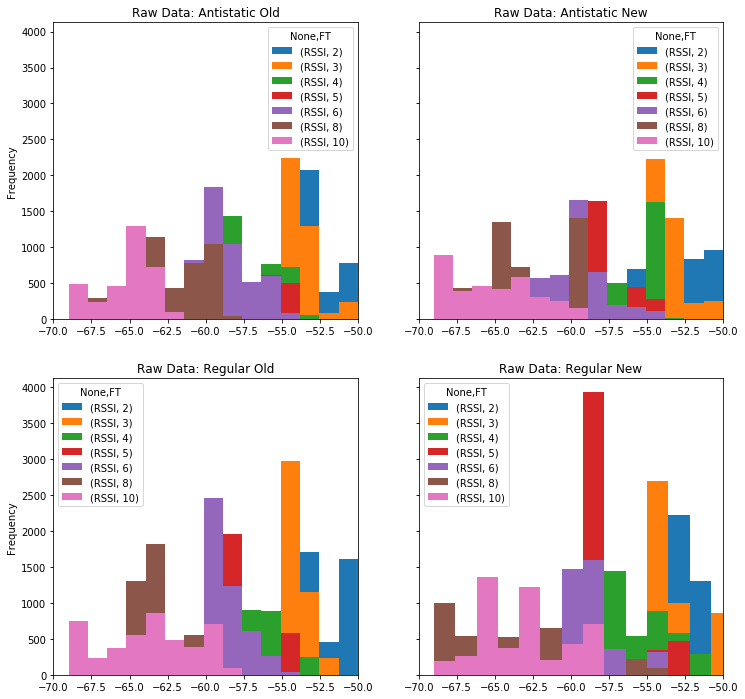

In [147]:
raw_data_0 = data.loc["antistatic"].loc['old'].drop(columns=["DATETIME", "MAC"]).unstack(level="FT")
raw_data_1 = data.loc["antistatic"].loc['new'].drop(columns=["DATETIME", "MAC"]).unstack(level="FT")
raw_data_2 = data.loc["regular"].loc['old'].drop(columns=["DATETIME", "MAC"]).unstack(level="FT")
raw_data_3 = data.loc["regular"].loc['new'].drop(columns=["DATETIME", "MAC"]).unstack(level="FT")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12), sharey=True)
raw_data_0.plot(ax=axes[0][0], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Raw Data: Antistatic Old")
raw_data_1.plot(ax=axes[0][1], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Raw Data: Antistatic New")
raw_data_2.plot(ax=axes[1][0], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Raw Data: Regular Old")
raw_data_3.plot(ax=axes[1][1], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Raw Data: Regular New")

In [148]:
mean = data.drop(columns=["DATETIME", "MAC"]).unstack("HOLDER").unstack("BATCH").unstack("FT").mean()

print mean, "\n"
print mean.std(level="HOLDER"), "\n"
print mean.std(level="BATCH"), "\n"
print mean.std(level="FT")

      HOLDER      BATCH  FT
RSSI  regular     new    2    -51.964785
                         3    -53.650392
                         4    -56.040422
                         5    -57.543660
                         6    -59.530035
                         8    -63.442297
                         10   -63.194666
                  old    2    -52.670933
                         3    -54.409550
                         4    -57.144078
                         5    -58.442857
                         6    -59.076378
                         8    -63.346520
                         10   -63.633409
      antistatic  new    2    -53.464144
                         3    -54.477128
                         4    -57.074492
                         5    -58.851327
                         6    -61.070576
                         8    -63.613528
                         10   -65.088805
                  old    2    -53.429116
                         3    -54.687512
                         4   

## ROLLING MEAN

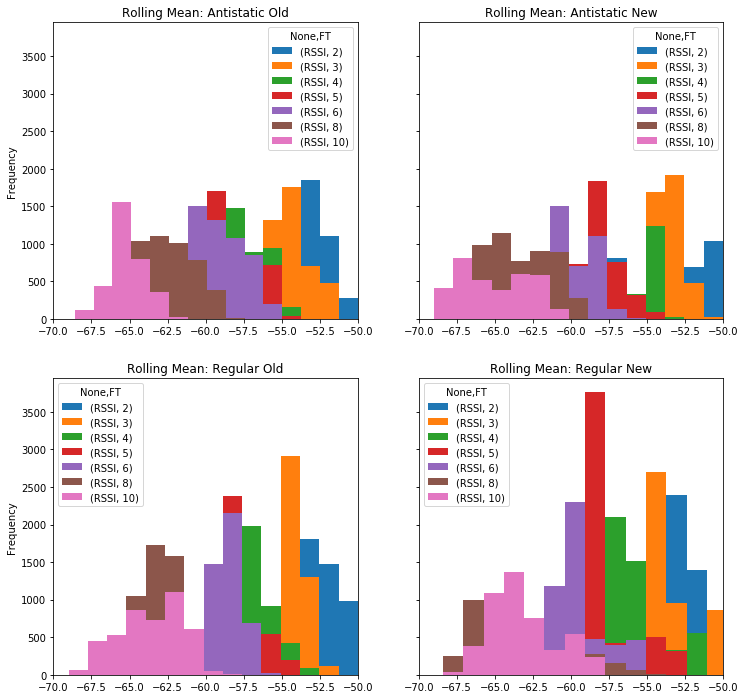

In [149]:
roll_mean_0 = data.loc["antistatic"].loc['old'].groupby("MAC").rolling(5).mean().drop(columns=["DATETIME", "MAC"]).unstack(level="FT")
roll_mean_1 = data.loc["antistatic"].loc['new'].groupby("MAC").rolling(5).mean().drop(columns=["DATETIME", "MAC"]).unstack(level="FT")
roll_mean_2 = data.loc["regular"].loc['old'].groupby("MAC").rolling(5).mean().drop(columns=["DATETIME", "MAC"]).unstack(level="FT")
roll_mean_3 = data.loc["regular"].loc['new'].groupby("MAC").rolling(5).mean().drop(columns=["DATETIME", "MAC"]).unstack(level="FT")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12), sharey=True)
roll_mean_0.plot(ax=axes[0][0], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Rolling Mean: Antistatic Old")
roll_mean_1.plot(ax=axes[0][1], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Rolling Mean: Antistatic New")
roll_mean_2.plot(ax=axes[1][0], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Rolling Mean: Regular Old")
roll_mean_3.plot(ax=axes[1][1], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Rolling Mean: Regular New")

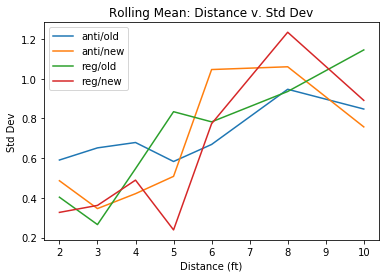

In [150]:
roll_mean_std0 = data.loc["antistatic"].loc['old'].groupby("MAC").rolling(5).mean().drop(columns=["DATETIME", "MAC"]).unstack("FT").std(level="MAC").mean()
roll_mean_std1 = data.loc["antistatic"].loc['new'].groupby("MAC").rolling(5).mean().drop(columns=["DATETIME", "MAC"]).unstack("FT").std(level="MAC").mean()
roll_mean_std2 = data.loc["regular"].loc['old'].groupby("MAC").rolling(5).mean().drop(columns=["DATETIME", "MAC"]).unstack("FT").std(level="MAC").mean()
roll_mean_std3 = data.loc["regular"].loc['new'].groupby("MAC").rolling(5).mean().drop(columns=["DATETIME", "MAC"]).unstack("FT").std(level="MAC").mean()

plt.plot(dist, roll_mean_std0, label="anti/old")
plt.plot(dist, roll_mean_std1, label="anti/new")
plt.plot(dist, roll_mean_std2, label="reg/old")
plt.plot(dist, roll_mean_std3, label="reg/new")

plt.legend()
plt.xlabel("Distance (ft)")
plt.ylabel("Std Dev")
plt.title("Rolling Mean: Distance v. Std Dev")

plt.show()

## ROLLING MAX

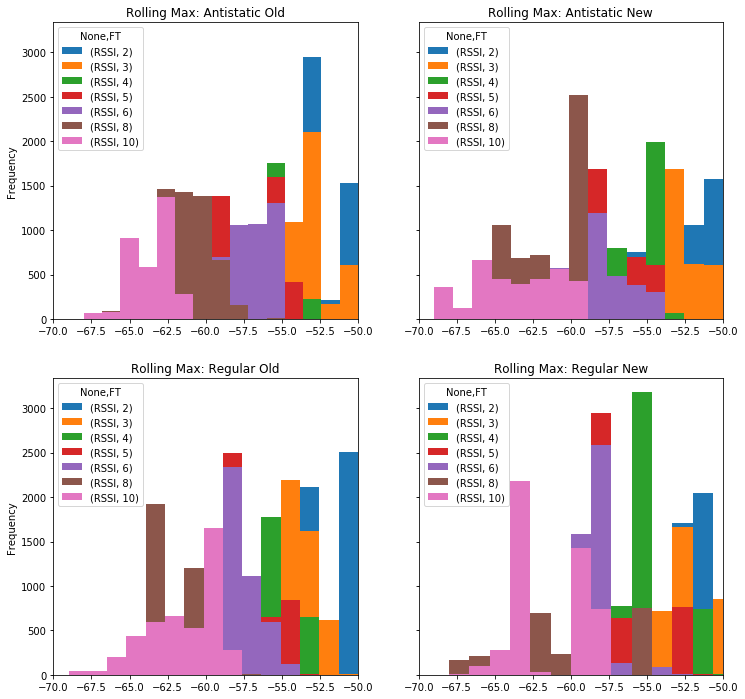

In [151]:
roll_max_0 = data.loc["antistatic"].loc['old'].groupby("MAC").rolling(5).max().drop(columns=["DATETIME", "MAC"]).unstack(level="FT")
roll_max_1 = data.loc["antistatic"].loc['new'].groupby("MAC").rolling(5).max().drop(columns=["DATETIME", "MAC"]).unstack(level="FT")
roll_max_2 = data.loc["regular"].loc['old'].groupby("MAC").rolling(5).max().drop(columns=["DATETIME", "MAC"]).unstack(level="FT")
roll_max_3 = data.loc["regular"].loc['new'].groupby("MAC").rolling(5).max().drop(columns=["DATETIME", "MAC"]).unstack(level="FT")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12), sharey=True)
roll_max_0.plot(ax=axes[0][0], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Rolling Max: Antistatic Old")
roll_max_1.plot(ax=axes[0][1], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Rolling Max: Antistatic New")
roll_max_2.plot(ax=axes[1][0], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Rolling Max: Regular Old")
roll_max_3.plot(ax=axes[1][1], kind="hist", alpha=1, bins=15, xlim=(-70,-50), title="Rolling Max: Regular New")

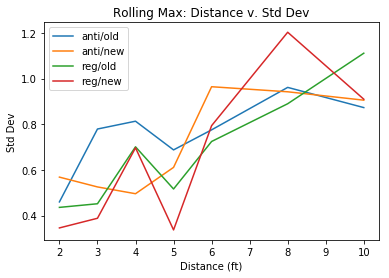

In [153]:
roll_max_std0 = data.loc["antistatic"].loc['old'].groupby("MAC").rolling(5).max().drop(columns=["DATETIME", "MAC"]).unstack("FT").std(level="MAC").mean()
roll_max_std1 = data.loc["antistatic"].loc['new'].groupby("MAC").rolling(5).max().drop(columns=["DATETIME", "MAC"]).unstack("FT").std(level="MAC").mean()
roll_max_std2 = data.loc["regular"].loc['old'].groupby("MAC").rolling(5).max().drop(columns=["DATETIME", "MAC"]).unstack("FT").std(level="MAC").mean()
roll_max_std3 = data.loc["regular"].loc['new'].groupby("MAC").rolling(5).max().drop(columns=["DATETIME", "MAC"]).unstack("FT").std(level="MAC").mean()

plt.plot(dist, roll_max_std0, label="anti/old")
plt.plot(dist, roll_max_std1, label="anti/new")
plt.plot(dist, roll_max_std2, label="reg/old")
plt.plot(dist, roll_max_std3, label="reg/new")

plt.legend()
plt.xlabel("Distance (ft)")
plt.ylabel("Std Dev")
plt.title("Rolling Max: Distance v. Std Dev")

plt.show()